In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
# Reading ratings file
ratings = pd.read_csv('./ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('./users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('./movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

# Reading movies info file
movies_info = pd.read_csv('./info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

## 一、传统偏好发现



In [2]:
# 数据预处理：将用户评分数据（`ratings`）、用户信息（`users`）进行合并，形成一个完整的数据集,只保留流行的电影
popular = ratings['movie_id'].value_counts()
popular = popular[popular > 300]
popular = popular.rename('count')
popular = popular.rename_axis('movie_id')
data = pd.merge(ratings, users,on = 'user_id', how='outer')
data = data[data['movie_id'].isin(popular.index)]

In [3]:
mean_rating = data.groupby('movie_id')['rating'].mean() # 计算每部电影的平均评分
unique_values = data['age_desc'].unique()
for value in unique_values:
    vusers = data[data['age_desc'] == value]
    score = vusers.groupby('movie_id')['rating'].mean().reset_index()
    score['delta_rating'] = score['rating'] - mean_rating
    score = pd.merge(score, popular, on='movie_id', how='outer')
    
    # 指标一 : (年龄段平均打分-全局平均打分)*观影人数
    score['score1'] = score['delta_rating'] * np.log(score['count'])
    print(f"{value} ")

    # 指标二 : 统计量：𝑅𝑎=𝑊𝑅+(1−𝑊)𝑅0
    alpha = 0.5
    score['score2'] = alpha * score['count'] / score['count'].mean()
    score['score2'] = score['score2'].apply(lambda x: min(x, 1))
    score['score2'] = score['score2'] * score['rating'] + (1 - score['score2']) * mean_rating

    # 按score1排序展示
    score = score.sort_values(by='score1', ascending=False)
    preference = score.nlargest(10, 'score1').reset_index()
    print("该年龄段最偏好的10部电影：(score1)")
    preference_detail = pd.merge(preference, movies, on='movie_id', how='inner')
    preference_detail = preference_detail.drop(['rating', 'count', 'score1', 'movie_id','index','score2','delta_rating'], axis=1) # 去除无需展示的列
    preference_detail['ranking'] = preference_detail.index.to_series().apply(lambda x: x+1)
    preference_detail = preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
    display(preference_detail)

    # 按score2排序展示
    preference = score.nlargest(10, 'score2').reset_index()
    print("该年龄段最偏好的10部电影：(score2)")
    preference_detail = pd.merge(preference, movies, on='movie_id', how='inner')
    preference_detail = preference_detail.drop(['rating', 'count', 'score1', 'movie_id','index','score2','delta_rating'], axis=1) # 去除无需展示的列
    preference_detail['ranking'] = preference_detail.index.to_series().apply(lambda x: x+1)
    preference_detail = preference_detail.set_index('ranking') # 增加“排名”这一列，并将其设为index
    display(preference_detail)

Under 18 
该年龄段最偏好的10部电影：(score1)


,title,genres
ranking,,
1,"Silence of the Lambs, The (1991)",Drama|Thriller
2,Lethal Weapon (1987),Action|Comedy|Crime|Drama
3,Rear Window (1954),Mystery|Thriller
4,Hamlet (1996),Drama
5,Gandhi (1982),Drama
6,"Christmas Story, A (1983)",Comedy|Drama
7,Austin Powers: International Man of Mystery (1...,Comedy
8,Jaws (1975),Action|Horror
9,Easy Rider (1969),Adventure|Drama


该年龄段最偏好的10部电影：(score2)


,title,genres
ranking,,
1,Ghost Dog: The Way of the Samurai (1999),Crime|Drama
2,"Grand Day Out, A (1992)",Animation|Comedy
3,Citizen Kane (1941),Drama
4,Midnight Cowboy (1969),Drama
5,"Bridge on the River Kwai, The (1957)",Drama|War
6,Butch Cassidy and the Sundance Kid (1969),Action|Comedy|Western
7,"Ideal Husband, An (1999)",Comedy
8,Dead Man Walking (1995),Drama
9,Alive (1993),Drama


56+ 
该年龄段最偏好的10部电影：(score1)


,title,genres
ranking,,
1,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical
2,Butch Cassidy and the Sundance Kid (1969),Action|Comedy|Western
3,M*A*S*H (1970),Comedy|War
4,It Happened One Night (1934),Comedy
5,Lethal Weapon 3 (1992),Action|Comedy|Crime|Drama
6,"Terminator, The (1984)",Action|Sci-Fi|Thriller
7,Lawrence of Arabia (1962),Adventure|War
8,Cinema Paradiso (1988),Comedy|Drama|Romance
9,Shall We Dance? (Shall We Dansu?) (1996),Comedy


该年龄段最偏好的10部电影：(score2)


,title,genres
ranking,,
1,Henry V (1989),Drama|War
2,Fargo (1996),Crime|Drama|Thriller
3,Saving Private Ryan (1998),Action|Drama|War
4,Harvey (1950),Comedy
5,Key Largo (1948),Crime|Drama|Film-Noir|Thriller
6,Butch Cassidy and the Sundance Kid (1969),Action|Comedy|Western
7,"French Connection, The (1971)",Action|Crime|Drama|Thriller
8,"African Queen, The (1951)",Action|Adventure|Romance|War
9,Indiana Jones and the Last Crusade (1989),Action|Adventure


25-34 
该年龄段最偏好的10部电影：(score1)


,title,genres
ranking,,
1,"Silence of the Lambs, The (1991)",Drama|Thriller
2,"Exorcist, The (1973)",Horror
3,Rear Window (1954),Mystery|Thriller
4,Harold and Maude (1971),Comedy
5,Fantasia 2000 (1999),Animation|Children's|Musical
6,"Wrong Trousers, The (1993)",Animation|Comedy
7,"Godfather: Part II, The (1974)",Action|Crime|Drama
8,"Good, The Bad and The Ugly, The (1966)",Action|Western
9,"Sweet Hereafter, The (1997)",Drama


该年龄段最偏好的10部电影：(score2)


,title,genres
ranking,,
1,Raiders of the Lost Ark (1981),Action|Adventure
2,"Godfather: Part II, The (1974)",Action|Crime|Drama
3,In the Heat of the Night (1967),Drama|Mystery
4,"Silence of the Lambs, The (1991)",Drama|Thriller
5,"Matrix, The (1999)",Action|Sci-Fi|Thriller
6,Blade Runner (1982),Film-Noir|Sci-Fi
7,Bananas (1971),Comedy|War
8,Citizen Kane (1941),Drama
9,Fargo (1996),Crime|Drama|Thriller


45-49 
该年龄段最偏好的10部电影：(score1)


,title,genres
ranking,,
1,"Silence of the Lambs, The (1991)",Drama|Thriller
2,"Exorcist, The (1973)",Horror
3,Rear Window (1954),Mystery|Thriller
4,Fantasia 2000 (1999),Animation|Children's|Musical
5,"Wrong Trousers, The (1993)",Animation|Comedy
6,Harold and Maude (1971),Comedy
7,"Christmas Story, A (1983)",Comedy|Drama
8,Crimson Tide (1995),Drama|Thriller|War
9,"Godfather: Part II, The (1974)",Action|Crime|Drama


该年龄段最偏好的10部电影：(score2)


,title,genres
ranking,,
1,Raiders of the Lost Ark (1981),Action|Adventure
2,In the Heat of the Night (1967),Drama|Mystery
3,Fargo (1996),Crime|Drama|Thriller
4,Hackers (1995),Action|Crime|Thriller
5,Bananas (1971),Comedy|War
6,"Christmas Story, A (1983)",Comedy|Drama
7,Modern Times (1936),Comedy
8,"Silence of the Lambs, The (1991)",Drama|Thriller
9,"Godfather: Part II, The (1974)",Action|Crime|Drama


50-55 
该年龄段最偏好的10部电影：(score1)


,title,genres
ranking,,
1,Lethal Weapon (1987),Action|Comedy|Crime|Drama
2,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical
3,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
4,Magnolia (1999),Drama
5,It Happened One Night (1934),Comedy
6,Shall We Dance? (Shall We Dansu?) (1996),Comedy
7,Local Hero (1983),Comedy
8,Jaws (1975),Action|Horror
9,Gandhi (1982),Drama


该年龄段最偏好的10部电影：(score2)


,title,genres
ranking,,
1,"Grand Day Out, A (1992)",Animation|Comedy
2,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
3,To Kill a Mockingbird (1962),Drama
4,Midnight Cowboy (1969),Drama
5,"Ideal Husband, An (1999)",Comedy
6,Fargo (1996),Crime|Drama|Thriller
7,Hard-Boiled (Lashou shentan) (1992),Action|Crime
8,"Christmas Story, A (1983)",Comedy|Drama
9,Butch Cassidy and the Sundance Kid (1969),Action|Comedy|Western


35-44 
该年龄段最偏好的10部电影：(score1)


,title,genres
ranking,,
1,"Silence of the Lambs, The (1991)",Drama|Thriller
2,"Exorcist, The (1973)",Horror
3,Rear Window (1954),Mystery|Thriller
4,Harold and Maude (1971),Comedy
5,"Sweet Hereafter, The (1997)",Drama
6,Fantasia 2000 (1999),Animation|Children's|Musical
7,"Wrong Trousers, The (1993)",Animation|Comedy
8,"Godfather: Part II, The (1974)",Action|Crime|Drama
9,"Christmas Story, A (1983)",Comedy|Drama


该年龄段最偏好的10部电影：(score2)


,title,genres
ranking,,
1,Raiders of the Lost Ark (1981),Action|Adventure
2,In the Heat of the Night (1967),Drama|Mystery
3,"Godfather: Part II, The (1974)",Action|Crime|Drama
4,Blade Runner (1982),Film-Noir|Sci-Fi
5,"Terminator, The (1984)",Action|Sci-Fi|Thriller
6,"Silence of the Lambs, The (1991)",Drama|Thriller
7,Citizen Kane (1941),Drama
8,It's a Wonderful Life (1946),Drama
9,"Matrix, The (1999)",Action|Sci-Fi|Thriller


18-24 
该年龄段最偏好的10部电影：(score1)


,title,genres
ranking,,
1,"Silence of the Lambs, The (1991)",Drama|Thriller
2,"Exorcist, The (1973)",Horror
3,Rear Window (1954),Mystery|Thriller
4,Fantasia 2000 (1999),Animation|Children's|Musical
5,Harold and Maude (1971),Comedy
6,"Sweet Hereafter, The (1997)",Drama
7,Being There (1979),Comedy
8,"Wrong Trousers, The (1993)",Animation|Comedy
9,Dogma (1999),Comedy


该年龄段最偏好的10部电影：(score2)


,title,genres
ranking,,
1,"Matrix, The (1999)",Action|Sci-Fi|Thriller
2,"Silence of the Lambs, The (1991)",Drama|Thriller
3,Raiders of the Lost Ark (1981),Action|Adventure
4,"Godfather: Part II, The (1974)",Action|Crime|Drama
5,Full Metal Jacket (1987),Action|Drama|War
6,In the Heat of the Night (1967),Drama|Mystery
7,Bananas (1971),Comedy|War
8,Citizen Kane (1941),Drama
9,Chinatown (1974),Film-Noir|Mystery|Thriller


In [4]:
# 前置工作

genre_list = []
for i in movies.genres:
    genre = i.split(sep='|')
    genre_list += genre
genre_list = list(set(genre_list))

num_movies = movies.shape[0]
for genre in genre_list:
    movies[genre] = 0
for i in movies.index:
    genre = movies.loc[i].genres.split(sep='|')
    for j in genre:
        movies[j][i] = 1
        
data = pd.merge(pd.merge(ratings, users, how='outer'),movies, how='outer')
datas = {value: data[data['age_desc'] == value] for value in unique_values}

list1 = [item for item in unique_values for _ in range(5)]
list2 = ['mean', 'std', 'count', 'portion','precentage'] *len(unique_values)
df_2 = pd.DataFrame(np.zeros((len(genre_list), 35)), index=genre_list, columns=[list1, list2])

genre_rating = []
for i in genre_list:
    for j in unique_values:
        data_2 = datas[j]
        data_2_genre = data_2[data_2[i] == 1]
        mean = data_2_genre.rating.mean()
        std = data_2_genre.rating.std()
        data_2_genre.rating = (data_2_genre.rating - mean) / std
        df_2.loc[i, (j, 'mean')] = mean
        df_2.loc[i, (j, 'std')] = std
        df_2.loc[i, (j, 'count')] = data_2_genre.shape[0]
        df_2.loc[i, (j, 'portion')] = df_2.loc[i, (j, 'count')] / num_movies
        genre_rating.append(data_2_genre.rating.to_list())

for i in genre_list:
    sumterm = 0 
    for j in unique_values:
        sumterm += df_2.loc[i, (j, 'count')]
    for j in unique_values:
        df_2.loc[i, (j, 'precentage')] = df_2.loc[i, (j, 'count')] / sumterm

df_2

Under 18                                               56+  \
                 mean       std    count   portion precentage      mean   
Romance      3.621284  1.149813   3599.0  0.926861   0.024396  3.816531   
Mystery      3.631522  1.236059    920.0  0.236930   0.022898  3.890545   
Horror       3.254184  1.336767   2211.0  0.569405   0.028945  3.254401   
Crime        3.710170  1.130880   1701.0  0.438063   0.021385  3.832549   
Thriller     3.550373  1.208835   4824.0  1.242338   0.025432  3.719749   
Fantasy      3.317647  1.193179   1360.0  0.350245   0.037465  3.532700   
Drama        3.794735  1.122580   7483.0  1.927118   0.021107  3.933465   
Animation    3.476113  1.227552   2449.0  0.630698   0.056568  3.756233   
Action       3.506385  1.204259   6578.0  1.694051   0.025550  3.610709   
Children's   3.241642  1.259536   4337.0  1.116920   0.060081  3.621822   
Adventure    3.449975  1.199981   3998.0  1.029616   0.029846  3.649064   
Sci-Fi       3.478698  1.224071   4178.0  1.075972   0.026562  3.497746   
Comedy       3.497491  1.197181  11162.0  2.874582   0.031303  3.650949   
Film-Noir    4.145455  0.956530    330.0  0.084986   0.018071  4.125932   
War          3.895437  1.163748   1578.0  0.406387   0.023027  4.067285   
Western      3.576119  1.165637    335.0  0.086273   0.016197  3.792198   
Musical      3.568306  1.206016   1647.0  0.424157   0.039655  3.886713   
Documentary  3.730769  1.304663    130.0  0.033479   0.016435  3.961538   

                                                     ...     35-44            \
                  std    count   portion precentage  ...      mean       std   
Romance      1.029870   6279.0  1.617049   0.042563  ...  3.651142  1.025477   
Mystery      0.998433   2147.0  0.552923   0.053437  ...  3.697396  1.052780   
Horror       1.286739   1761.0  0.453515   0.023054  ...  3.276022  1.199384   
Crime        1.028783   2974.0  0.765903   0.037390  ...  3.733736  1.032765   
Thriller     1.066528   6537.0  1.683492   0.034463  ...  3.615934  1.073797   
Fantasy      1.123798    948.0  0.244141   0.026115  ...  3.482301  1.088209   
Drama        0.973370  17269.0  4.447335   0.048710  ...  3.782512  1.013257   
Animation    1.055592   1083.0  0.278908   0.025016  ...  3.740545  1.021792   
Action       1.078470   8143.0  2.097090   0.031629  ...  3.538107  1.092875   
Children's   1.091952   1888.0  0.486222   0.026155  ...  3.518423  1.086433   
Adventure    1.076759   4488.0  1.155807   0.033504  ...  3.515291  1.089356   
Sci-Fi       1.148707   4880.0  1.256760   0.031025  ...  3.502119  1.125507   
Comedy       1.101903  11961.0  3.080350   0.033544  ...  3.561984  1.082017   
Film-Noir    0.920946   1207.0  0.310842   0.066097  ...  4.064910  0.907485   
War          0.972176   3775.0  0.972186   0.055088  ...  3.901130  1.032348   
Western      1.043872   1333.0  0.343291   0.064449  ...  3.679278  1.053298   
Musical      1.014659   1889.0  0.486480   0.045482  ...  3.721587  1.058336   
Documentary  1.001187    260.0  0.066959   0.032870  ...  3.953747  1.017523   

                                               18-24                     \
               count    portion precentage      mean       std    count   
Romance      29330.0   7.553438   0.198816  3.534300  1.106523  25656.0   
Mystery       8179.0   2.106361   0.203569  3.525387  1.156242   6401.0   
Horror       15122.0   3.894412   0.197968  3.172682  1.241694  15184.0   
Crime        14895.0   3.835952   0.187262  3.668054  1.139190  15373.0   
Thriller     36840.0   9.487510   0.194222  3.494634  1.149396  35877.0   
Fantasy       7006.0   1.804275   0.192997  3.353778  1.191600   7875.0   
Drama        71590.0  18.436776   0.201930  3.721930  1.098603  58104.0   
Animation     8117.0   2.090394   0.187490  3.624014  1.130263  10269.0   
Action       50503.0  13.006181   0.196161  3.447097  1.174197  50186.0   
Children's   14004.0   3.606490   0.193999  3.294257  1.222381  16924.0   
Adventure  

<Figure size 1000x800 with 0 Axes>

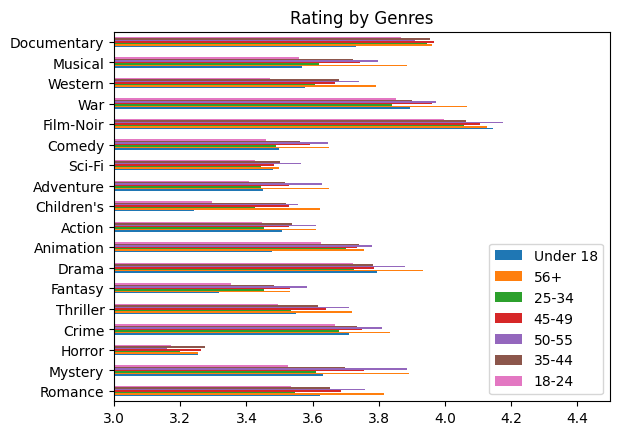

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(10, 8))  
df_2.plot.barh(y=[('Under 18', 'mean'), ('56+', 'mean'), ('25-34', 'mean'), 
                  ('45-49', 'mean'), ('50-55', 'mean'), ('35-44', 'mean'), ('18-24', 'mean')])
plt.title('Rating by Genres')
plt.xlim(3, 4.5)
plt.legend(['Under 18', '56+', '25-34', '45-49', '50-55', '35-44', '18-24'])
plt.show()
plt.savefig('1-2-1.png')


<Figure size 1000x800 with 0 Axes>

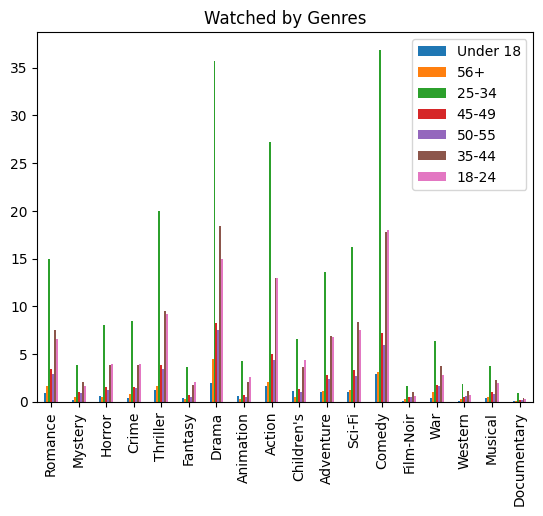

<Figure size 640x480 with 0 Axes>

In [6]:
plt.figure(figsize=(10, 8))  # 设置图形的大小，宽度为10，高度为8
df_2.plot.bar(y=[ ('Under 18', 'portion'),
                 ('56+', 'portion'), ('25-34', 'portion'), ('45-49', 'portion'),
                 ('50-55', 'portion'), ('35-44', 'portion'), ('18-24', 'portion')],
              )
plt.title('Watched by Genres')
plt.legend(['Under 18', '56+', '25-34', '45-49', '50-55', '35-44', '18-24'])
plt.show()
plt.savefig('1-2-2.png')


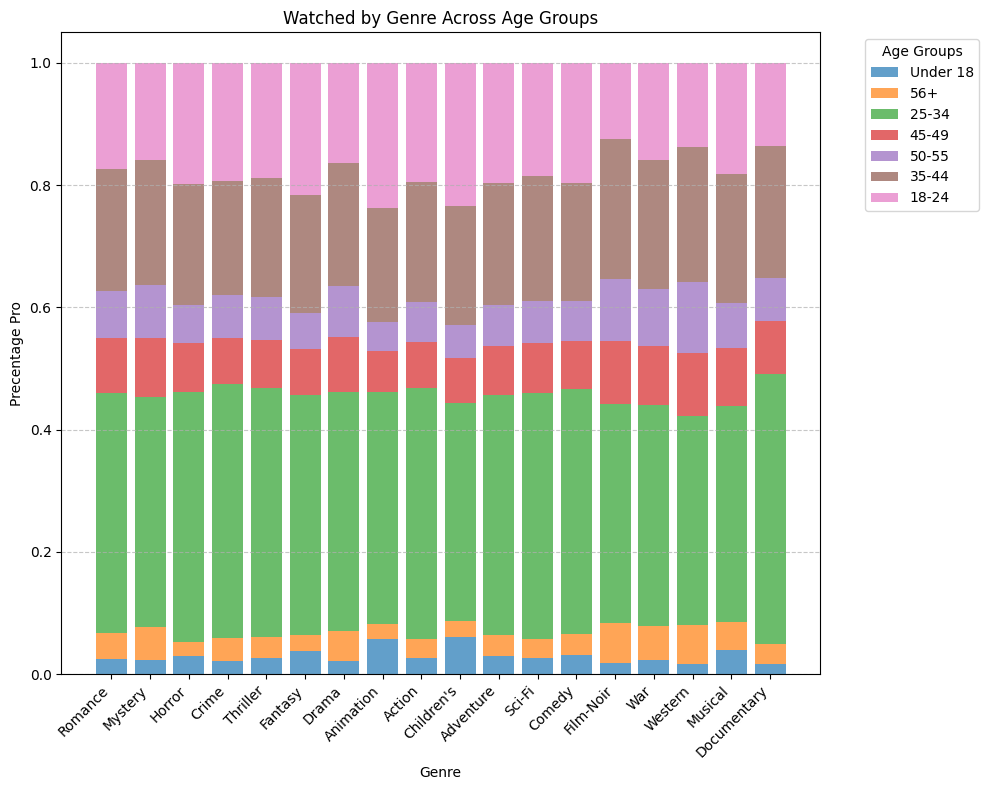

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.arange(len(unique_values)))
bottoms = np.zeros(len(genre_list))
for idx, age_group in enumerate(unique_values):
    age_group_portions = [df_2.loc[genre, (age_group, 'precentage')] for genre in genre_list]
    plt.bar(genre_list, age_group_portions, bottom=bottoms, label=age_group, color=colors[idx], alpha=0.7)
    bottoms += age_group_portions

plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Watched by Genre Across Age Groups')
plt.xlabel('Genre')
plt.ylabel('Precentage Pro')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('1-2-3.png')


## 二、用户对电影的打分预测

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import datetime
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [35]:
movie_ratings = pd.merge(ratings, movies, on='movie_id')
df = pd.merge(movie_ratings, users, on='user_id')
df = pd.merge(df, movies_info, on='movie_id',how = 'left')


In [36]:
df = pd.concat([df, pd.get_dummies(df['age_desc'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['occ_desc'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['gender'])], axis=1)
df.drop(['timestamp', 'zipcode','genres','title','gender','age_desc','occ_desc','release_time','stars','directors','name','genre'], axis=1, inplace=True)
# 用观影数>100的用户作为数据
grouped = df.groupby('user_id')
df = grouped.filter(lambda x: len(x) > 100)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Fill missing values in 'intro' column with an empty string
df['intro'].fillna('', inplace=True)
print(df.shape)

(843702, 52)


In [38]:
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Choose the top 100 most important features
intro_tfidf_features = tfidf_vectorizer.fit_transform(df['intro'])
intro_tfidf_df = pd.DataFrame(intro_tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df.reset_index(drop=True, inplace=True)
df = pd.concat([df, intro_tfidf_df], axis=1)
df.drop(['intro'], axis=1, inplace=True)

In [39]:
y = df['rating']
X = df.drop(['rating','movie_id','user_id'] ,axis=1)
X.fillna(0, inplace=True)
X = X.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
'''
pca = PCA(n_components=0.9)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
'''

'\npca = PCA(n_components=0.9)  \nX_train_pca = pca.fit_transform(X_train)\nX_test_pca = pca.transform(X_test)\n'

In [41]:
print(X.dtypes)


Romance     float64
Mystery     float64
Horror      float64
Crime       float64
Thriller    float64
             ...   
wrong       float64
year        float64
years       float64
york        float64
young       float64
Length: 548, dtype: object


In [49]:
# %pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation=tf.nn.leaky_relu, input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # 线性激活函数用于回归任务
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
4219/4219 [==============================] - 9s 2ms/step - loss: 1.2220 - val_loss: 1.0177
Epoch 2/50
4219/4219 [==============================] - 8s 2ms/step - loss: 1.0620 - val_loss: 0.9849
Epoch 3/50
4219/4219 [==============================] - 8s 2ms/step - loss: 1.0160 - val_loss: 0.9765
Epoch 4/50
4219/4219 [==============================] - 9s 2ms/step - loss: 0.9918 - val_loss: 0.9684
Epoch 5/50
4219/4219 [==============================] - 8s 2ms/step - loss: 0.9772 - val_loss: 0.9610
Epoch 6/50
4219/4219 [==============================] - 8s 2ms/step - loss: 0.9663 - val_loss: 0.9566
Epoch 7/50
4219/4219 [==============================] - 8s 2ms/step - loss: 0.9609 - val_loss: 0.9548
Epoch 8/50
4219/4219 [==============================] - 8s 2ms/step - loss: 0.9560 - val_loss: 0.9473
Epoch 9/50
4219/4219 [==============================] - 9s 2ms/step - loss: 0.9529 - val_loss: 0.9490
Epoch 10/50
4219/4219 [==============================] - 8s 2ms/step - loss: 0.949

In [50]:
y_test_pred = model.predict(X_test)
mse = np.mean((y_test.values-y_test_pred.transpose())**2)
print(mse)

5274/5274 [==============================] - 3s 605us/step
0.9416227133118297


## 三、海报按内容聚类

In [18]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import torch
from img2vec_pytorch import Img2Vec

# 文件夹路径
folder_path = "./poster"

# 初始化特征列表
features = []

img2vec_model = Img2Vec()

# 遍历文件夹中的每个海报图像
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # 读取图像
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        # 提取颜色直方图和灰度直方图特征
        color_hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        color_hist = cv2.normalize(color_hist, color_hist).flatten()  # 归一化并展开成一维数组

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
        gray_hist = cv2.normalize(gray_hist, gray_hist).flatten()  # 归一化并展开成一维数组

        # 使用Img2Vec模型提取特征向量
        image_pil = Image.open(image_path)
        if image_pil.mode != 'RGB':
            image_pil = image_pil.convert('RGB')
        vector = img2vec_model.get_vec(image_pil)

        # 拼接特征向量
        # feature_vector = np.concatenate((color_hist, gray_hist, vector))
        feature_vector = vector #显然用直方图效果不太好

        # 添加图像文件前缀（电影ID）和特征向量到特征列表中
        features.append([filename.split('.')[0], feature_vector])

# 将特征列表转换为DataFrame
columns = ['movie_id', 'features']
df = pd.DataFrame(features, columns=columns)

# 输出带有电影ID和特征向量的DataFrame
print("DataFrame with Movie ID and Features:")
print(df.head())


DataFrame with Movie ID and Features:
  movie_id                                           features
0        1  [1.2273525, 1.1728468, 0.29160962, 3.7952738, ...
1       10  [0.6591355, 0.563311, 0.1754671, 0.47256583, 0...
2      100  [1.270225, 2.129366, 0.1338063, 0.0, 0.0327485...
3     1003  [1.4408051, 1.2796657, 0.79114556, 0.65906763,...
4     1004  [0.54259104, 0.7196604, 0.11201007, 0.7017186,...


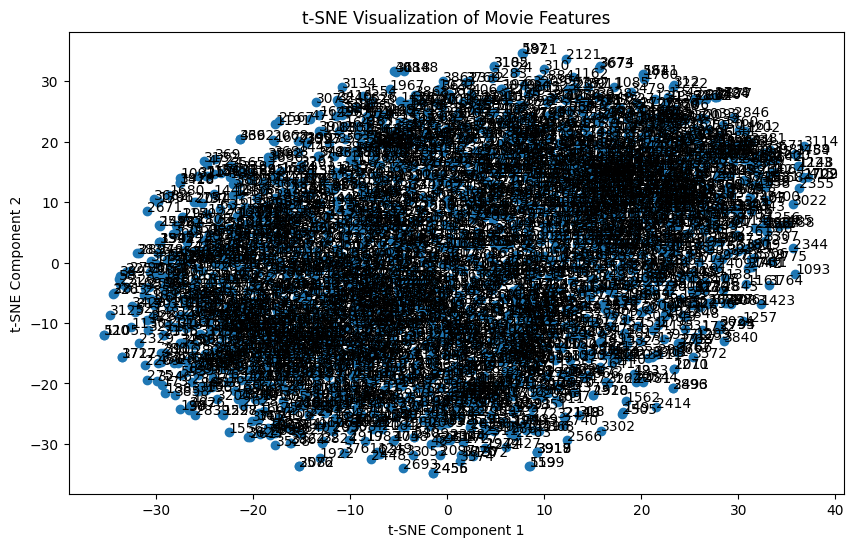

In [19]:
features = np.array(df['features'].tolist())
tsne = TSNE(n_components=2)  # 选择要降到的维度，这里选择2维
tsne_result = tsne.fit_transform(features)
# 将降维结果添加到DataFrame中
df_tsne = df.copy()
df_tsne['tsne_1'] = tsne_result[:, 0]
df_tsne['tsne_2'] = tsne_result[:, 1]

# 可视化降维结果
plt.figure(figsize=(10, 6))
plt.scatter(df_tsne['tsne_1'], df_tsne['tsne_2'])
for i, txt in enumerate(df_tsne['movie_id']):
    plt.annotate(txt, (df_tsne['tsne_1'][i], df_tsne['tsne_2'][i]))
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Movie Features')
plt.savefig('t-SNE_visualization.png')

In [20]:

pca = PCA(n_components=2)  
pca_result = pca.fit_transform(features)
df_pca = df.copy()
df_pca = pd.concat([df_pca, pd.DataFrame(pca_result)], axis=1)
df_pca = df_pca.drop('features', axis=1)
df
df_pca


,movie_id,0,1
0,1,0.888033,7.090606
1,10,-2.843914,-2.006210
2,100,-1.348069,-7.377142
3,1003,-0.849956,-7.726642
4,1004,-0.192374,-6.362211
...,...,...,...
2686,639,3.685097,2.378900
2687,64,-1.813376,-4.019283
2688,640,-0.324212,-8.905975
2689,645,0.917206,0.849569


In [21]:
X = df_pca.drop(columns=['movie_id']).values
kmeans = KMeans(n_clusters=5)  
kmeans.fit(X)
df['cluster'] = kmeans.labels_
df

,movie_id,features,cluster
0,1,"[1.2273525, 1.1728468, 0.29160962, 3.7952738, ...",3
1,10,"[0.6591355, 0.563311, 0.1754671, 0.47256583, 0...",1
2,100,"[1.270225, 2.129366, 0.1338063, 0.0, 0.0327485...",1
3,1003,"[1.4408051, 1.2796657, 0.79114556, 0.65906763,...",1
4,1004,"[0.54259104, 0.7196604, 0.11201007, 0.7017186,...",1
...,...,...,...
2686,639,"[1.3885574, 0.77763265, 0.1500269, 2.0080466, ...",0
2687,64,"[0.3042227, 0.142017, 1.1655649, 0.4444042, 0....",1
2688,640,"[0.0152105, 0.82088107, 0.08806884, 0.00178515...",1
2689,645,"[0.05858545, 1.7211349, 0.872499, 0.076398686,...",2


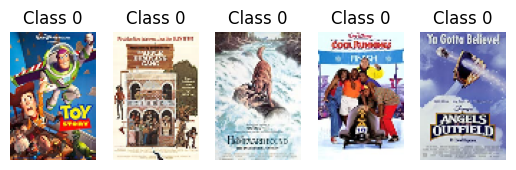

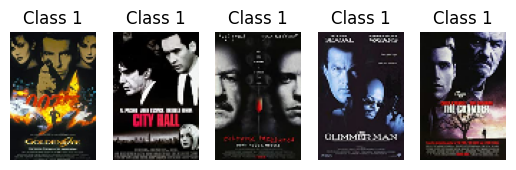

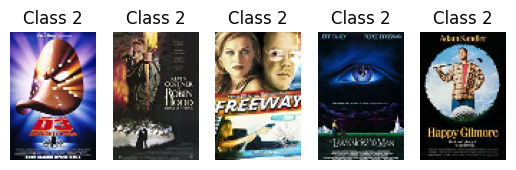

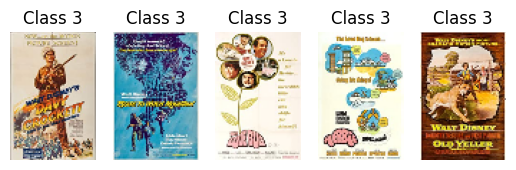

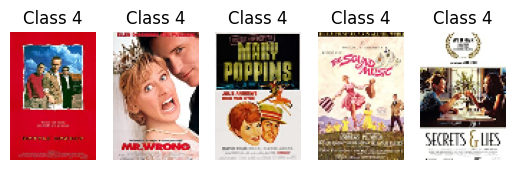

<Figure size 640x480 with 0 Axes>

In [22]:
num_images_per_class = 5
representative_images = []
for cluster_id in df['cluster'].unique():
    cluster_indices = df[df['cluster'] == cluster_id].index.tolist()
    representative_images.append(cluster_indices[:num_images_per_class])
    
for i, indices in enumerate(representative_images):
    # 设置图像的大小
    for j, index in enumerate(indices):
        # 读取代表性图像
        representative_image_path = os.path.join(folder_path, os.listdir(folder_path)[index])
        representative_image = cv2.imread(representative_image_path)
        representative_image = cv2.resize(representative_image, (60, 90))
        # 绘制图像
        plt.subplot(1, 5, j+1)
        plt.imshow(cv2.cvtColor(representative_image, cv2.COLOR_BGR2RGB))
        plt.title("Class {}".format(i))
        plt.axis("off")

    plt.show()
    plt.savefig(f'cluster_{i}.png')

In [23]:
movies_df = pd.read_csv("./movies.csv")

# 提取genre信息
genres = movies_df['genres']
# 初始化genre的字典
genre_dict = {}

# 遍历每个电影的genre信息
for genre_string in genres:
    # 将genre字符串按照"|"分割成列表
    genre_list = genre_string.split("|")
    # 遍历列表中的每个genre
    for genre in genre_list:
        # 将genre添加到字典中，如果已存在则不重复添加
        if genre not in genre_dict:
            genre_dict[genre] = len(genre_dict)

# 输出genre字典
print("Genre Dictionary:")
print(genre_dict)

Genre Dictionary:
{'Animation': 0, "Children's": 1, 'Comedy': 2, 'Adventure': 3, 'Fantasy': 4, 'Romance': 5, 'Drama': 6, 'Action': 7, 'Crime': 8, 'Thriller': 9, 'Horror': 10, 'Sci-Fi': 11, 'Documentary': 12, 'War': 13, 'Musical': 14, 'Mystery': 15, 'Film-Noir': 16, 'Western': 17}


In [24]:
# 将genre信息转换为向量形式
genre_vectors = []

# 遍历每个电影的genre信息
for genre_string in genres:
    # 将genre字符串按照"|"分割成列表
    genre_list = genre_string.split("|")
    # 初始化genre向量
    genre_vector = [0] * len(genre_dict)
    # 根据genre列表设置向量中对应的位置为1
    for genre in genre_list:
        genre_vector[genre_dict[genre]] = 1
    # 将genre向量添加到列表中
    genre_vectors.append(genre_vector)

# 将genre向量转换为列表
genre_lists = [list(genre_vector) for genre_vector in genre_vectors]

# 将genre列表添加到movies_df中
movies_df['genre_vector'] = genre_lists

# 输出带有genre向量的movies_df
print("Movies DataFrame with Genre Vector:")
print(movies_df.head())

Movies DataFrame with Genre Vector:
   Unnamed: 0  movie_id                               title  \
0           0         1                    Toy Story (1995)   
1           1         2                      Jumanji (1995)   
2           2         3             Grumpier Old Men (1995)   
3           3         4            Waiting to Exhale (1995)   
4           4         5  Father of the Bride Part II (1995)   

                         genres  \
0   Animation|Children's|Comedy   
1  Adventure|Children's|Fantasy   
2                Comedy|Romance   
3                  Comedy|Drama   
4                        Comedy   

                                        genre_vector  
0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  


In [25]:
# 将电影ID列转换为整数类型
movies_df['movie_id'] = movies_df['movie_id'].astype(int)
df['movie_id'] = df['movie_id'].astype(int)

In [26]:
# 使用 merge 方法按照 movie_id 合并两个 DataFrame
merged_df = pd.merge(movies_df, df, on='movie_id', how='inner')

# 输出合并后的 DataFrame
print("Merged DataFrame:")
print(merged_df.head())

Merged DataFrame:
   Unnamed: 0  movie_id                               title  \
0           0         1                    Toy Story (1995)   
1           1         2                      Jumanji (1995)   
2           2         3             Grumpier Old Men (1995)   
3           3         4            Waiting to Exhale (1995)   
4           4         5  Father of the Bride Part II (1995)   

                         genres  \
0   Animation|Children's|Comedy   
1  Adventure|Children's|Fantasy   
2                Comedy|Romance   
3                  Comedy|Drama   
4                        Comedy   

                                        genre_vector  \
0  [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                            features  c

In [27]:
print(merged_df.columns)

Index(['Unnamed: 0', 'movie_id', 'title', 'genres', 'genre_vector', 'features',
       'cluster'],
      dtype='object')


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 提取特征和标签
features = np.array(merged_df['features'].tolist())
cluster = np.array(merged_df['cluster'].tolist())
X = np.concatenate((features, cluster[:, np.newaxis]), axis=1) 
y = np.array(merged_df['genre_vector'].tolist())


# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2152, 513) (539, 513) (2152, 18) (539, 18)


In [34]:
import tensorflow as tf
# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),  # 输入层
    tf.keras.layers.Dense(256, activation=tf.nn.leaky_relu),  # 隐藏层
    tf.keras.layers.Dropout(0.3),  # Dropout层，丢弃30%的神经元
    tf.keras.layers.Dense(128, activation='relu'),  # 隐藏层
    tf.keras.layers.Dropout(0.5),  # Dropout层，丢弃50%的神经元
    tf.keras.layers.Dense(64, activation='relu'),  # 隐藏层
    tf.keras.layers.Dropout(0.5),  # Dropout层，丢弃50%的神经元
    tf.keras.layers.Dense(18, activation='sigmoid')  # 输出层，因为是多标签分类，使用sigmoid激活函数
])

# 编译模型
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # 多标签分类问题，使用交叉熵损失函数
              metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.08)

# 评估模型性能
y_pred = model.predict(X_test)
y_pred_bool = (y_pred > 0.5).astype(np.float32)
accuracy = accuracy_score(y_test, y_pred_bool)
print("Classification Report:")
print(classification_report(y_test, y_pred_bool))
print("Accuracy:", accuracy)

Epoch 1/100


31/31 [==============================] - 1s 6ms/step - loss: 0.5631 - accuracy: 0.0824 - val_loss: 0.3335 - val_accuracy: 0.1445
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.1304 - val_loss: 0.2968 - val_accuracy: 0.3410
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.1895 - val_loss: 0.2817 - val_accuracy: 0.3584
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3224 - accuracy: 0.2052 - val_loss: 0.2832 - val_accuracy: 0.3237
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.2163 - val_loss: 0.2729 - val_accuracy: 0.2601
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.2678 - val_loss: 0.2735 - val_accuracy: 0.3353
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.2942 - accuracy: 0.2749 - val_loss: 0.2717 - val_accuracy: 0.3526
Epoch 8/100
31/31 [======